In [2]:
#import libries
import numpy as np
import pandas as pd

In [3]:
#read excel file 
file_path = 'Canada.xlsx'
df_can = pd.read_excel(
    file_path,
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)
print('Data read into a dataframe!')

Data read into a dataframe!


In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

In [6]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'},inplace=True)

Let's set Country as the index, it will help you to plot the charts easily, by refering to the country names as index value

In [7]:
df_can.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()

In [8]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


In [9]:
#convert the years to string
years = list(map(str, range(1980, 2014)))
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [10]:
df_can['Total']=df_can.sum(axis=1)
df_can['Total']

C:\Users\alimo\AppData\Local\Temp\ipykernel_22540\448506213.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total']=df_can.sum(axis=1)


Country
Afghanistan       58639
Albania           15699
Algeria           69439
American Samoa        6
Andorra              15
                  ...  
Viet Nam          97146
Western Sahara        2
Yemen              2985
Zambia             1677
Zimbabwe           8598
Name: Total, Length: 195, dtype: int64

Since we converted the years to string, let's declare a variable that will allow us to easily call upon the full range of year

# Visualizing Data using Matplotlib<a id="8"></a>

In [11]:
# we are using the inline backend
%matplotlib inline 

#import matplotlib as plt
import matplotlib.pyplot as plt

### Plotting in *pandas*

Fortunately, pandas has a built-in implementation of Matplotlib that we can use. Plotting in *pandas* is as simple as appending a `.plot()` method to a series or dataframe.

Documentation:
- [Plotting with Series](http://pandas.pydata.org/pandas-docs/stable/api.html#plotting)<br>
- [Plotting with Dataframes](http://pandas.pydata.org/pandas-docs/stable/api.html#api-dataframe-plotting)


In [12]:
# it converts all the column names to strings using the str() function.
df_can.columns = list(map(str, df_can.columns))
years = list(map(str, range(1980, 2014)))

## Pie charts using matplotlib

In [13]:
df_contient=df_can.groupby('Continent',axis=0).sum()
df_contient

C:\Users\alimo\AppData\Local\Temp\ipykernel_22540\1513714450.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_contient=df_can.groupby('Continent',axis=0).sum()


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


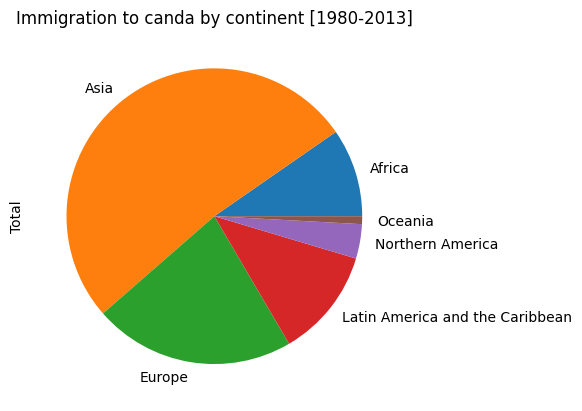

In [13]:
df_contient['Total'].plot(kind='pie')
plt.title('Immigration to canda by continent [1980-2013]')
plt.show()

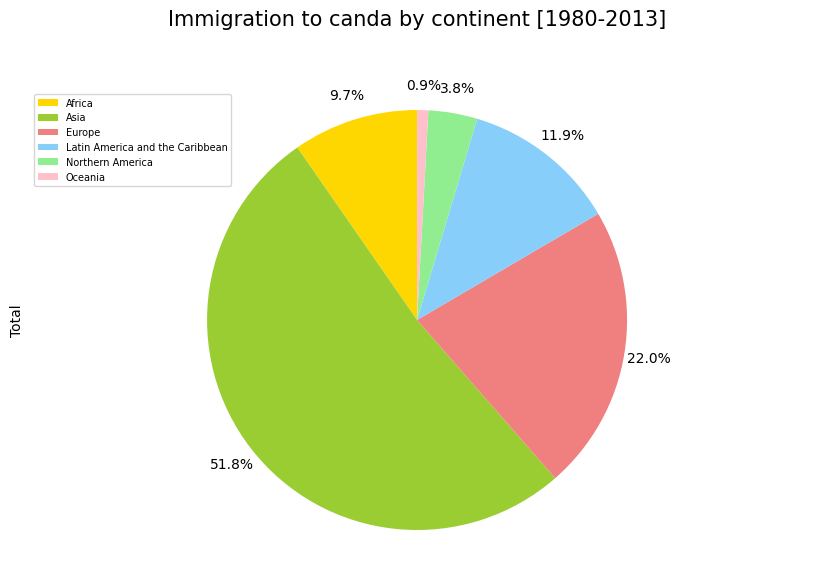

In [14]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

df_contient['Total'].plot(kind='pie',
                          figsize=(10,6),
                          autopct='%1.1f%%',
                          startangle=90,
                          #shadow=True,
                          labels=None,
                          pctdistance=1.12,
                          colors=colors_list,
                          #explode=explode_list,
                          )
plt.title('Immigration to canda by continent [1980-2013]',y=1.12 ,fontsize=15)
plt.axis('equal')
plt.legend(labels=df_contient.index,loc='upper left',fontsize=7)
plt.show()

## Box plot using matplotlib
* A box plot is a way of statistically representing the distribution of given data through five primary dimensions :
    * minimum is the smallest number in the sorted data
    * First quartile is the point 25% of the way through the sorted data
      * quarter of the data points are less than this value
    * Median is the median of the sorted data
    * third quartile is the point 75% of the way through the sorted data
      * three quarters of the data points are less than this value
    * maximum is the highest number in the sorted data
    

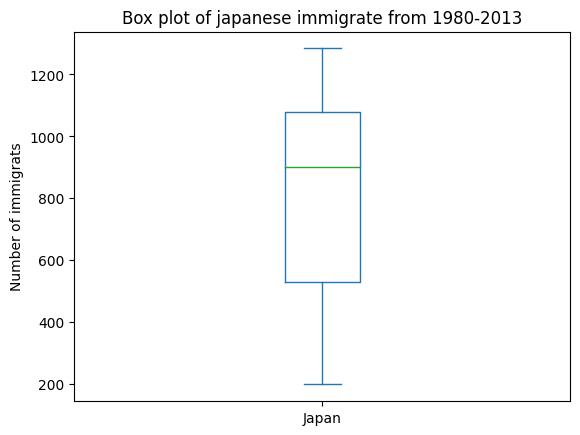

In [15]:
df_japan=df_can.loc[['Japan'],years].transpose()
#df_japan
df_japan.plot(kind='box')
plt.title('Box plot of japanese immigrate from 1980-2013')
plt.ylabel('Number of immigrats')
plt.show()


## Scater plot using matplotlib

In [16]:
df_total = pd.DataFrame(df_can[years].sum(axis=0))
# change the years to type int (useful for regression later on)
df_total.index = map(int, df_total.index)
# reset the index to put in back in as a column in the df_tot dataframe
df_total.reset_index(inplace = True)
# rename columns
df_total.columns = ['year', 'total']
df_total.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


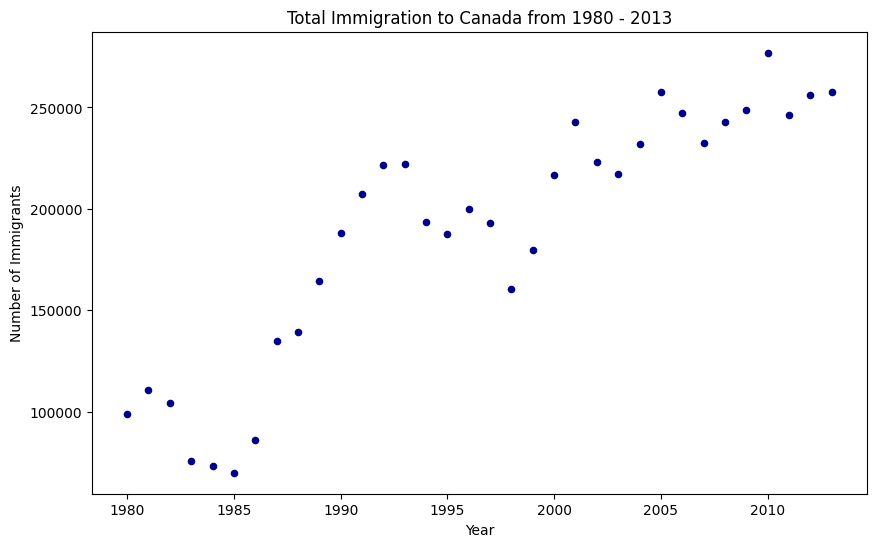

In [17]:
df_total.plot(kind='scatter',
               x='year',
               y='total',
               figsize=(10, 6), 
               color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

Notice how the scatter plot does not connect the data  points together. We can clearly observe an upward trend in the data: as the years go by, the total number of immigrants increases. We can mathematically analyze this upward trend using a regression line (line of best fit).

So let's try to plot a linear line of best fit, and use it to  predict the number of immigrants in 2015.

Step 1: Get the equation of line of best fit. We will use **Numpy**'s `polyfit()` method by passing in the following:

*   `x`: x-coordinates of the data.
*   `y`: y-coordinates of the data.
*   `deg`: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.


In [18]:
x = df_total['year']      # year on x-axis
y = df_total['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression `y= a * x + b`, our output has 2 elements `[5.56709228e+03, -1.09261952e+07]` with the the slope in position 0 and intercept in position 1.

Step 2: Plot the regression line on the `scatter plot`.


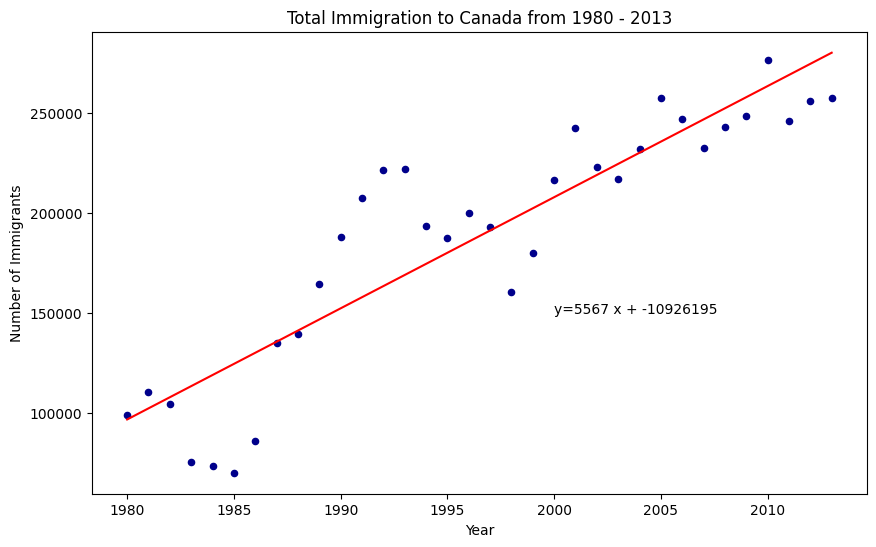

'No. Immigrants = 5567 * Year + -10926195'

In [19]:
df_total.plot(kind='scatter',
               x='year',
               y='total',
               figsize=(10, 6), 
               color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

## Bubble plot using matplotlib

**Let's start by analyzing the effect of Argentina's great depression**.

Argentina suffered a great depression from 1998 to 2002, which caused widespread unemployment, riots, the fall of the government, and a default on the country's foreign debt. In terms of income, over 50% of Argentines were poor, and seven out of ten Argentine children were poor at the depth of the crisis in 2002.

In [18]:
df_can_t = df_can[years].transpose()
#df_can_t.head()
#cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)
#df_can_t.head()
#let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'
#df_can_t.head()
df_can_t.reset_index(inplace=True)
df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


Create the normalized weights.
<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%203/images/Mod3Fig3FeatureScaling.png" align="center">

where $X$ is the original value, $X'$ is the corresponding normalized value. The formula sets the max value in the dataset to 1, and sets the min value to 0. The rest of the data points are scaled to a value between 0-1 accordingly.


In [19]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

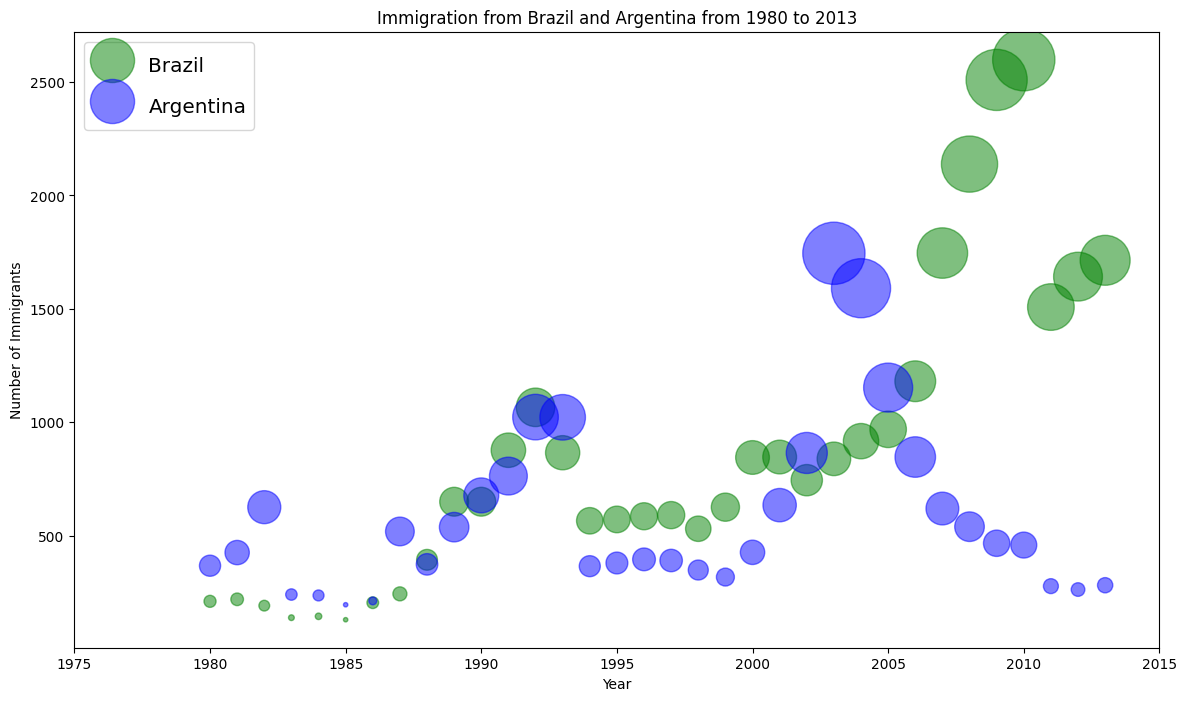

In [20]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  #  The size of the markers
                    xlim=(1975, 2015) # Sets the x-axis limits.
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10, #  The size of the markers
                    ax=ax0 # Overlays the plot on the first plot (ax0).
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large',handlelength=2, handleheight=2)

# Ploting Directly with Matplotlib

creating a figure and axis using *plt.subplots()*. This is a common way to create a Matplotlib plot. fig is the figure object, and ax is an array of axes objects (or a single axes object if you're creating a single subplot).

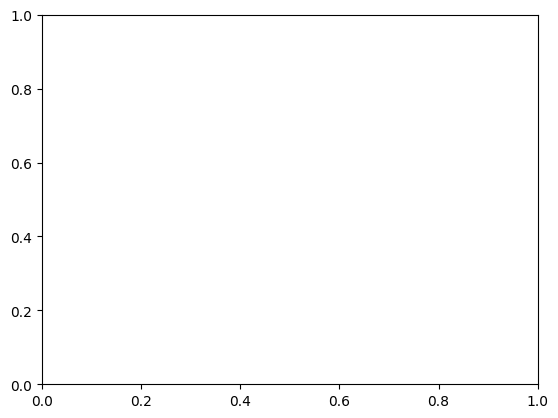

In [22]:
#create a figure and axes
fig,ax=plt.subplots()

In [23]:
#1D Array
years=np.arange(1980,2014)
years

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013])

In [24]:
imgratnts=np.random.randint(2000,10000,size=(34,))
imgratnts

array([7561, 5269, 7302, 5761, 2621, 6743, 3553, 3056, 6454, 4070, 2770,
       5712, 3393, 3670, 5061, 2212, 5307, 3151, 6459, 8177, 8538, 2940,
       2627, 7607, 8598, 3963, 5000, 8267, 8847, 8510, 8889, 7515, 3483,
       2245])

### line plot

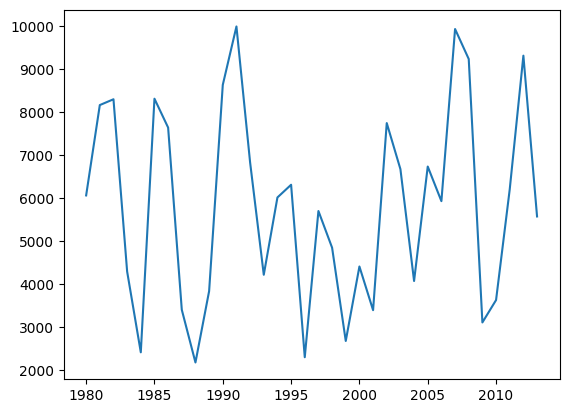

In [28]:
#create figure and axes
fig,ax=plt.subplots()
# Plot data on the axes
ax.plot(years,imgratnts)
plt.show()

### scatter plot

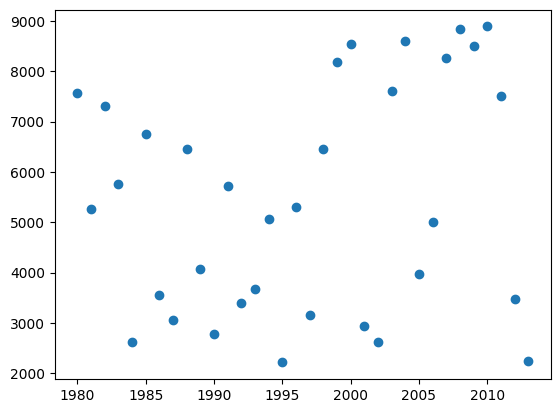

In [25]:
#create figure and axes
fig,ax=plt.subplots()
ax.scatter(years,imgratnts)
plt.show()

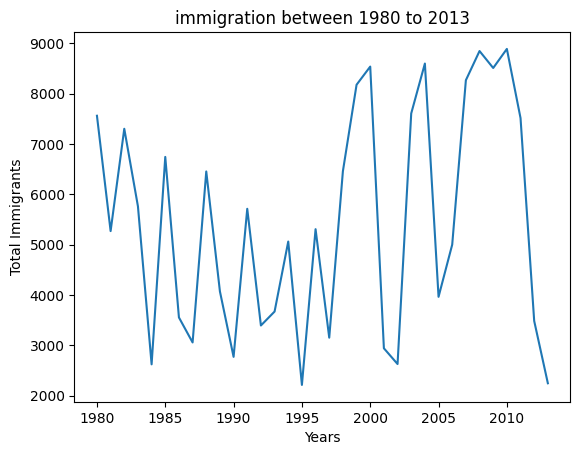

In [26]:
#customizing attributes
fig,ax=plt.subplots()
ax.plot(years,imgratnts)
plt.title("immigration between 1980 to 2013")
plt.xlabel("Years")
plt.ylabel("Total Immigrants")
plt.show()

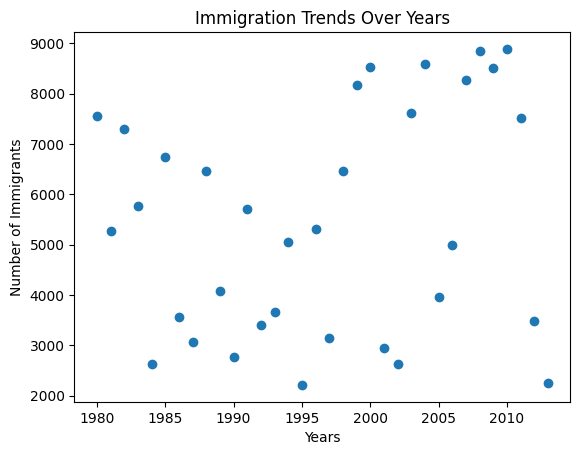

In [27]:
#customizing attributes
fig,ax=plt.subplots()
ax.scatter(years,imgratnts)
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')
ax.set_title('Immigration Trends Over Years')
plt.show()

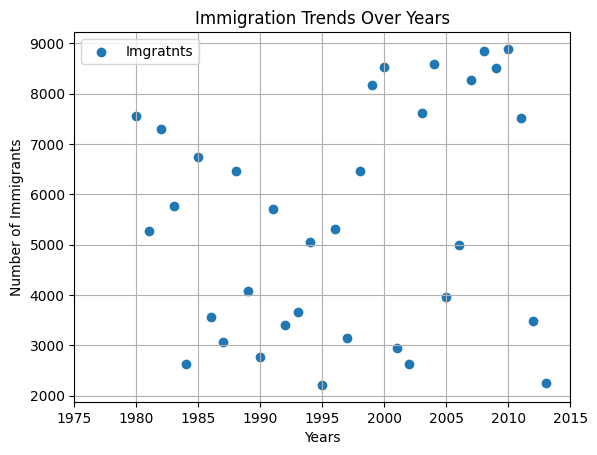

In [31]:
#customizing attributes
fig,ax=plt.subplots()
ax.scatter(years,imgratnts)
#limit on x-axis
plt.xlim(1975,2015)
#or ax.set_xlim(1975,2015)
#enabling grid
plt.grid(True)
#or ax.grid(True)
ax.set_xlabel('Years')
ax.set_ylabel('Number of Immigrants')
plt.legend(["Imgratnts"])
#or ax.legend(["Imgratnts"])
ax.set_title('Immigration Trends Over Years')
plt.show()

### Marker styles ,colors , and size

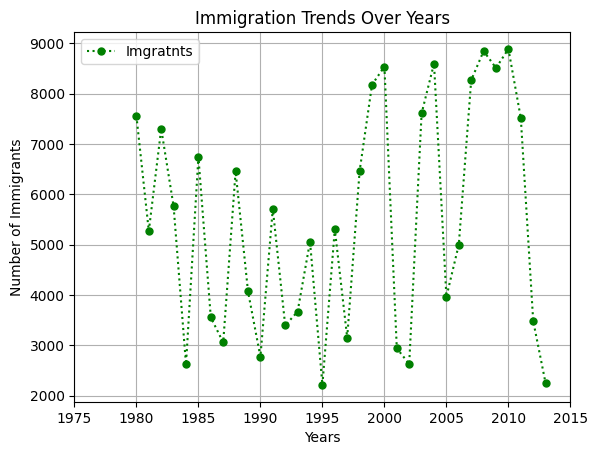

In [33]:
#Customizing appearance of plot
fig,ax=plt.subplots()
ax.plot(years,imgratnts,
        # "s" for sqaures and "o" for dots
        marker='o',
        markersize=5,
        color="green",
        linestyle="dotted")
#limit on x-axis
plt.xlim(1975,2015)
#or ax.set_xlim(1975,2015)
#enabling grid
plt.grid(True)
#or ax.grid(True)
ax.set_xlabel('Years')
plt.legend(["Imgratnts"])
#or ax.legend(["Imgratnts"])
ax.set_ylabel('Number of Immigrants')
ax.set_title('Immigration Trends Over Years')
plt.show()

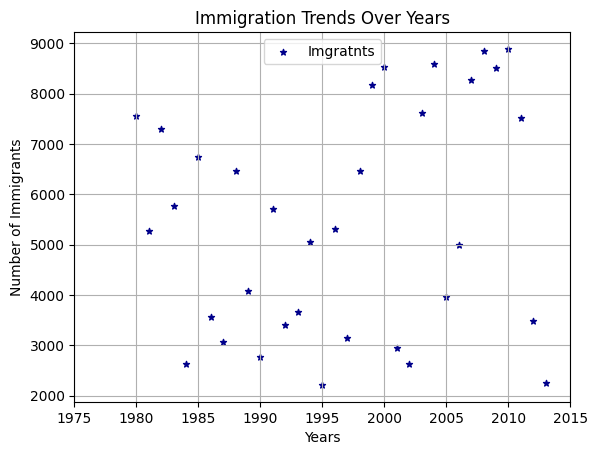

In [34]:
#customizing appearance of scater
fig,ax=plt.subplots()
ax.scatter(years,imgratnts,
           marker="*",
           s=20,
           color="darkblue")
#limit on x-axis
plt.xlim(1975,2015)
#or ax.set_xlim(1975,2015)
#enabling grid
plt.grid(True)
#or ax.grid(True)
ax.set_xlabel('Years')
plt.legend(["Imgratnts"],loc="upper center")
#or ax.legend(["Imgratnts"])
ax.set_ylabel('Number of Immigrants')
ax.set_title('Immigration Trends Over Years')
plt.show()

### Bar plot ,histogram and pie 

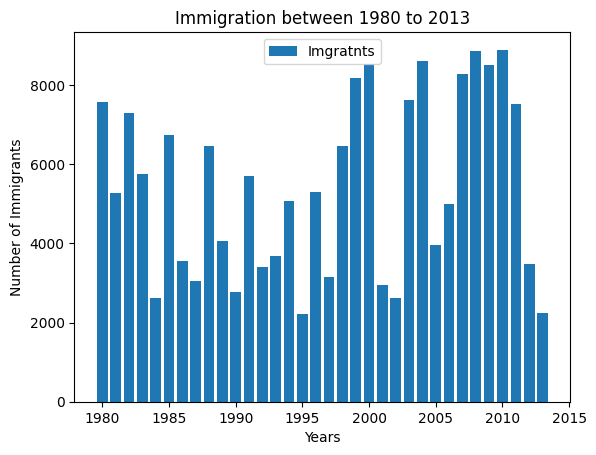

In [35]:
#customizing appearance of scater
fig,ax=plt.subplots()
ax.bar(years,imgratnts)
#or ax.set_xlim(1975,2015)
#or ax.grid(True)   
ax.set_xlabel('Years')
plt.legend(["Imgratnts"],loc="upper center")
#or ax.legend(["Imgratnts"])
ax.set_ylabel('Number of Immigrants')
ax.set_title('Immigration between 1980 to 2013')
plt.show()

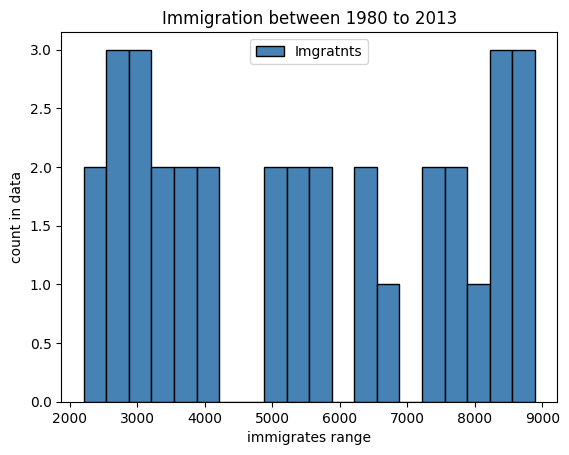

In [36]:
#customizing appearance of scater
fig,ax=plt.subplots()
ax.hist(imgratnts,bins=20,edgecolor='black',color="steelblue")
#or ax.set_xlim(1975,2015)
#or ax.grid(True)
ax.set_xlabel('immigrates range')
plt.legend(["Imgratnts"],loc="upper center")
#or ax.legend(["Imgratnts"])
ax.set_ylabel('count in data')
ax.set_title('Immigration between 1980 to 2013')
plt.show()

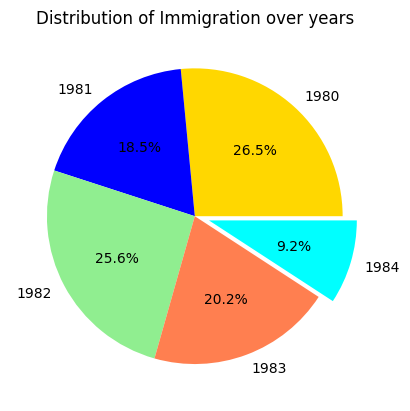

In [37]:
#Customizing appearance of bie
fig,ax=plt.subplots()
ax.pie(imgratnts[0:5],labels=years[0:5],
       colors=['gold','blue','lightgreen','coral','cyan'],
       autopct='%1.1f%%',explode = [0,0,0,0,0.1])
ax.set_title('Distribution of Immigration over years')
plt.show()

### Multiple plots and sub-plotting

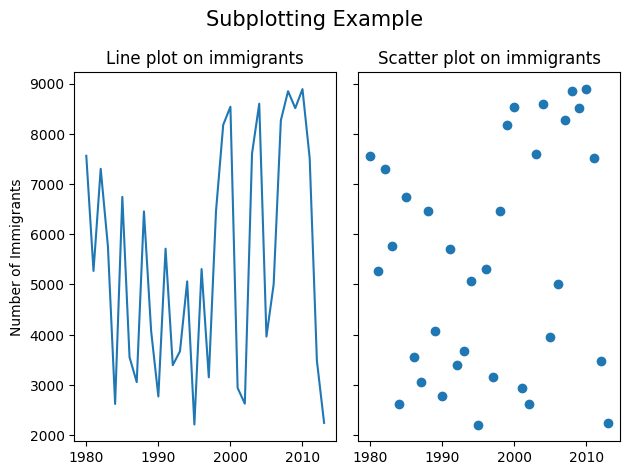

In [38]:
# Create a figure with two axes in a row

fig, axs = plt.subplots(1, 2, sharey=True)

#Plotting in first axes - the left one
axs[0].plot(years,imgratnts)
axs[0].set_title("Line plot on immigrants")

#Plotting in second axes - the right one
axs[1].scatter(years,imgratnts)
axs[1].set_title("Scatter plot on immigrants")

axs[0].set_ylabel("Number of Immigrants")
            
#Adding a Title for the Overall Figure
fig.suptitle('Subplotting Example', fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()


# Show the figure
plt.show()

In [48]:
# df=df_can.groupby(['Country'])[years].sum()
# df_dns=df.loc[['Denmark', 'Norway', 'Sweden'], years]
# df_dns=df_dns.T
# df_dns.head()

In [49]:
# # Create a figure with Four axes - two rows, two columns
# fig = plt.figure(figsize=(10, 10))

# # Add the first subplot (top-left)
# ax1 = fig.add_subplot(2, 2, 1)
# ax1.plot(years,imgratnts)
# ax1.set_title('Plot 1 - Line Plot')

# # Add the second subplot (top-right)
# ax2 = fig.add_subplot(2, 2, 2)
# ax2.scatter(years,imgratnts)
# ax2.set_title('Plot 2 - Scatter plot')

# # Add the third subplot (bottom-left)
# ax3 = fig.add_subplot(2, 2, 3)
# ax3.hist(df_dns)
# ax3.set_title('Plot3 - Histogram') 
# ax3.set_xlabel('Number of Immigrants')
# ax3.set_ylabel('Number of Years')

# # Add the fourth subplot (bottom-right)
# ax4 = fig.add_subplot(2, 2, 4)
# ax4.pie(imgratnts[0:5], labels=years[0:5], 
#            colors = ['gold','blue','lightgreen','coral','cyan'],
#            autopct='%1.1f%%')
# ax4.set_aspect('equal')  
# ax4.set_title('Plot 4 - Pie Chart')

# #Adding a Title for the Overall Figure
# fig.suptitle('Four Plots in a Figure Example', fontsize=15)

# # Adjust spacing between subplots
# fig.tight_layout()


# # Show the figure
# plt.show()
